In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
game_data = pd.read_csv('/content/vgames2.csv')

In [4]:
df = game_data.copy()

In [5]:
df = df.drop(columns='Unnamed: 0')

In [6]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
df[df.Publisher == 'Unknown'] #Publisher 행의 'Unknown' 값이 결측치임을 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
30,Kids Learn Music A+ Edition,DS,2011.0,Misc,Unknown,0.05,0,0,0
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
212,Wild West Shootout,Wii,2010.0,Shooter,Unknown,0.01,0.01,0,0
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
387,Gummy Bears Mini Golf,Wii,2010.0,Sports,Unknown,0.04,0,0,0
...,...,...,...,...,...,...,...,...,...
16400,Afrika,PS3,2008.0,Adventure,Unknown,0.12,0,0.08,0.01
16402,The Golf Club,XOne,2014.0,Sports,Unknown,0.02,0,0,0
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01


In [8]:
df['Publisher'] = df.Publisher.replace('Unknown', np.nan)

In [9]:
df = df.dropna().reset_index(drop=True) #대체할 수 있는 값이 없고 데이터의 양이 충분히 많으므로 결측치 제거

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16142 entries, 0 to 16141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16142 non-null  object 
 1   Platform     16142 non-null  object 
 2   Year         16142 non-null  float64
 3   Genre        16142 non-null  object 
 4   Publisher    16142 non-null  object 
 5   NA_Sales     16142 non-null  object 
 6   EU_Sales     16142 non-null  object 
 7   JP_Sales     16142 non-null  object 
 8   Other_Sales  16142 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [11]:
df['Year'] = df['Year'].astype('int') #Year column의 데이터 자료형 int로 변환

In [12]:
df.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 2017,
       1980, 2020,    2,   13,    0,   12,   94])

In [13]:
df.Year = df.Year.apply(lambda x: x+2000 if x<25 else (x+1900 if 25<x and x<100 else x+0))

In [14]:
df.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10865,Wallace & Gromit in Project Zoo,GC,2003,Platform,BAM! Entertainment,0.05,0.01,0,0
10479,Nobunaga's Ambition (3DS),3DS,2013,Simulation,Tecmo Koei,0,0,0.04,0
2990,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0,0
5395,Lord of Arcana,PSP,2010,Role-Playing,Square Enix,0.07,0.04,0.17,0.03
8964,Final Fantasy VI,PS,1999,Role-Playing,Sony Computer Entertainment,0,0,0.08,0.01
5809,Nanashi no Game Me,DS,2009,Action,Square Enix,0,0,0.03,0
8029,S.Y.K: Shinsetsu Saiyuuki Portable,PSP,2010,Adventure,Idea Factory,0,0,0.01,0
13410,Star Wars: The Force Unleashed,PSP,2008,Action,LucasArts,0.43,0.41,0,0.25
13571,Blood Omen 2,PS2,2002,Action,Eidos Interactive,0.19,0.15,0,0.05
13893,Super Bomberman 3,SNES,1994,Puzzle,Hudson Soft,0,0,0.7,0


In [15]:
for name in ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']:
  df[name] = df[name].str.replace('M', '')

In [16]:
def value_to_float(x):

  if 'K' in x:
    if len(x) > 1:
      return float(x.replace('K',''))*0.001

In [17]:
for name in ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']:
  df[name] = df[name].replace('K', '*0.001', regex=True).map(pd.eval).astype(float) # 자료의 자릿수 통일

In [18]:
for name in ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']:
  df[name] = df[name].astype(float) # 자료 형태 변환

In [19]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [20]:
df[df.duplicated(['Name', 'Platform'])==True ]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8490,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.0,0.01,0.00,0.00
12194,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.0,0.17,0.02,0.10
13433,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0.0,0.06,0.00,0.02


In [21]:
df[df.Name == 'Madden NFL 13'] #중복값 존재하는 것 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4706,Madden NFL 13,X360,2012,Sports,Electronic Arts,2.53,0.16,0.0,0.17
5142,Madden NFL 13,WiiU,2012,Sports,Electronic Arts,0.22,0.00,0.0,0.02
7154,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.0,0.22
8490,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.0,0.00
9261,Madden NFL 13,PSV,2012,Sports,Electronic Arts,0.30,0.00,0.0,0.03
11674,Madden NFL 13,Wii,2012,Sports,Electronic Arts,0.51,0.00,0.0,0.03


In [22]:
df[df.Name == 'Need for Speed: Most Wanted'] #출시 년도가 다르므로 중복값이 아닌 것 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1291,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.80,0.01,0.15
1482,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.71,1.51,0.06,0.61
2608,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.05
4544,Need for Speed: Most Wanted,GBA,2005,Racing,Electronic Arts,0.19,0.07,0.00,0.00
10756,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.01,0.25
11038,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.03,1.79,0.08,0.47
11852,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.24,0.01,0.00,0.02
12194,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.17,0.02,0.10
13249,Need for Speed: Most Wanted,WiiU,2013,Racing,Electronic Arts,0.14,0.12,0.00,0.02
13433,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0.00,0.06,0.00,0.02


In [24]:
df = df.drop_duplicates(['Name', 'Platform','Year']).reset_index(drop=True) #중복 값 제거

In [37]:
df.Platform.unique()

array(['Nintendo', 'PlayStation', 'PC', 'Xbox', '2600', 'SEGA', 'WS',
       'NG', 'TG16', '3DO', 'PCFX'], dtype=object)

In [36]:
df.Platform = df.Platform.replace(['DS', 'Wii', 'PS', 'GBA', 'GC', '3DS', 'GB', 'NES', 'N64', 'SNES', 'WiiU'],'Nintendo')
df.Platform = df.Platform.replace(['PSP', 'PS3', 'PS4', 'PS2', 'PSV'],'PlayStation')
df.Platform = df.Platform.replace(['XB', 'X360', 'XOne'],'Xbox')
df.Platform = df.Platform.replace(['DC' , 'GEN', 'SAT',  'SCD', 'GG'],'SEGA')

In [24]:
#1 지역에 따라 선호하는 게임 장르가 다를까

In [38]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [47]:
genre_sum = df.groupby('Genre')['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [49]:
all_region_sum = genre_sum.T.sum()

In [50]:
genre_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,857.49,513.04,155.62,183.92
Adventure,101.44,63.58,51.48,16.68
Fighting,220.35,99.90,87.10,36.15
Misc,393.64,207.43,104.09,72.47
Platform,445.28,200.45,130.53,51.43
Puzzle,121.32,50.23,56.18,12.42
Racing,354.62,233.90,55.90,76.17
Role-Playing,317.46,182.63,341.59,56.54
Shooter,574.27,310.20,38.18,101.85


Text(0.5, 1.0, 'All region')

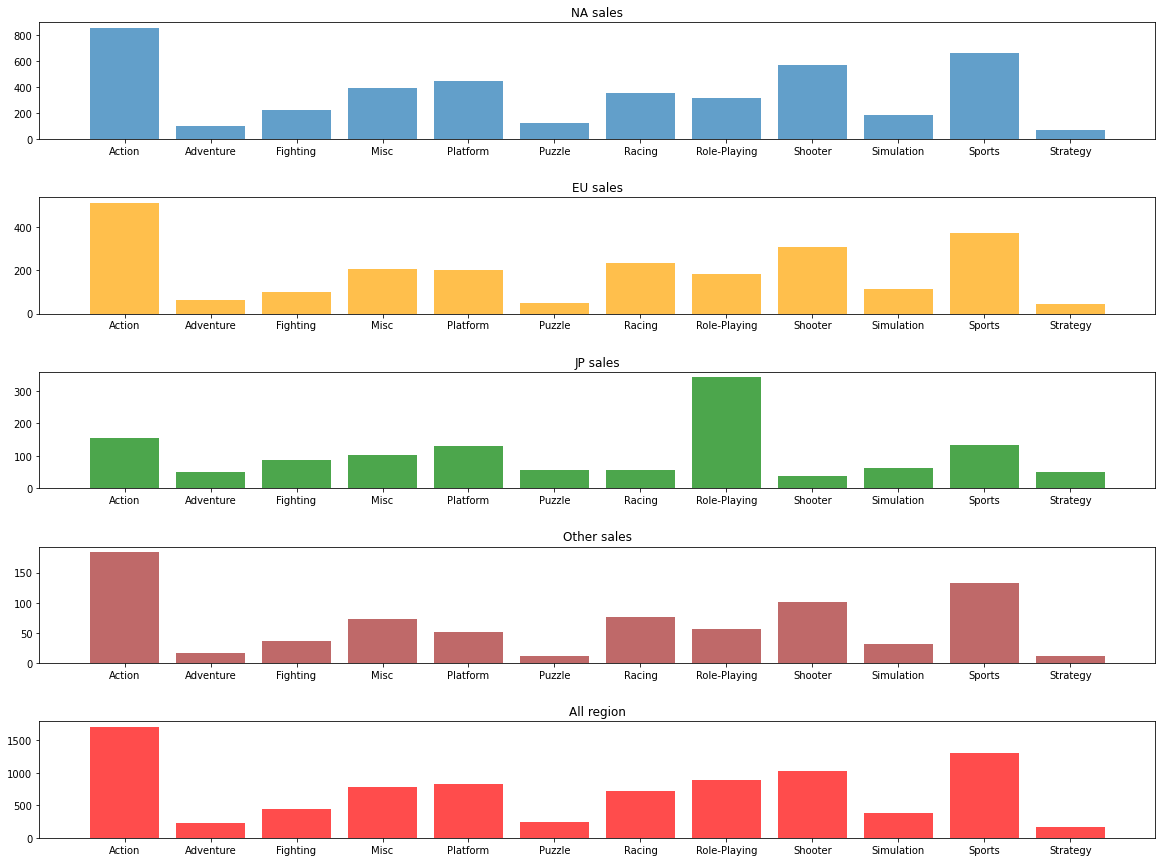

In [52]:
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

plt.subplot(5,1,1)
plt.bar(x = genre_sum.index, height = genre_sum.NA_Sales, alpha=0.7)
plt.title('NA sales')

plt.subplot(5,1,2)
plt.bar(x = genre_sum.index, height = genre_sum.EU_Sales, color='orange' ,alpha=0.7)
plt.title('EU sales')

plt.subplot(5,1,3)
plt.bar(x = genre_sum.index, height = genre_sum.JP_Sales, color = 'green', alpha=0.7)
plt.title('JP sales')

plt.subplot(5,1,4)
plt.bar(x = genre_sum.index, height = genre_sum.Other_Sales, color = 'brown', alpha=0.7)
plt.title('Other sales')

plt.subplot(5,1,5)
plt.bar(x = all_region_sum.index, height = all_region_sum, color = 'red', alpha=0.7)
plt.title('All region')

In [53]:
'''
NA와 EU에서는 대체적으로 비슷한 양상을 보이고 있으며
Platform과 Shooter 게임에서 강한 선호가 나타난다. 다만 NA에 비해 EU에서 Racing 게임에 대한 선호가 더 강하게 나타난다.

JP지역에서는 위의 두 지역과는 반대로 roleplaying 장르의 게임이 강세를 보이며
Platform과 Shooter 장르에서 약한 선호를 보임을 알 수 있다. 더불어 Action 장르에 대한 반응도 그리 좋지 못함을 알 수 있다.

이 외의 지역에서의 장르 선호 양상은 EU와 비슷하다.

전체 지역의 평균을 분석해 보았을 때 Platform 장르에서의 선호가 가장 높고, Shooter, roleplaying, racing에 대한 선호가 뒤를 이어 높은 것으로 나타났다.
Adventure, Strategy 장르에 대한 선호는 낮은 것으로 나타났다.
'''

'\nNA와 EU에서는 대체적으로 비슷한 양상을 보이고 있으며\nPlatform과 Shooter 게임에서 강한 선호가 나타난다. 다만 NA에 비해 EU에서 Racing 게임에 대한 선호가 더 강하게 나타난다.\n\nJP지역에서는 위의 두 지역과는 반대로 roleplaying 장르의 게임이 강세를 보이며\nPlatform과 Shooter 장르에서 약한 선호를 보임을 알 수 있다. 더불어 Action 장르에 대한 반응도 그리 좋지 못함을 알 수 있다.\n\n이 외의 지역에서의 장르 선호 양상은 EU와 비슷하다.\n\n전체 지역의 평균을 분석해 보았을 때 Platform 장르에서의 선호가 가장 높고, Shooter, roleplaying, racing에 대한 선호가 뒤를 이어 높은 것으로 나타났다.\nAdventure, Strategy 장르에 대한 선호는 낮은 것으로 나타났다.\n'

In [54]:
#2 연도별 게임의 트렌드가 있을까

In [55]:
df.groupby('Year').Name.count() #연도별 데이터를 확인해 보았을 때 데이터 수의 분포가 편향적임을 알 수 있음

Year
1980       8
1981      45
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     262
1997     289
1998     376
1999     336
2000     348
2001     477
2002     823
2003     773
2004     739
2005     933
2006    1003
2007    1193
2008    1421
2009    1427
2010    1235
2011    1091
2012     645
2013     543
2014     577
2015     605
2016     338
2017       3
2020       1
Name: Name, dtype: int64

In [56]:
df = df[df.Year <2017] #2017년 이후 데이터가 4종 밖에 없으므로 제외

In [57]:
df['Total_Sales'] = df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
df.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [59]:
df_year_sum = df.groupby(['Year','Genre'])['Total_Sales'].sum()
df_year_max1 = df_year_sum.groupby('Year').idxmax()

In [60]:
df_year_mean = df.groupby(['Year','Genre'])['Total_Sales'].mean()
df_year_max2 = df_year_mean.groupby('Year').idxmax()

In [61]:
df_year_max1 = df_year_max1.astype('str')
df_year_max2 = df_year_max2.astype('str')

In [62]:
df_split1 = df_year_max1.str.split(', ')
new_df_split1 = df_split1.str.get(1)
new_df_split1 = new_df_split1.str.replace('[^a-zA-Z]','')
df_split2 = df_year_max2.str.split(', ')
new_df_split2 = df_split2.str.get(1)
new_df_split2 = new_df_split2.str.replace('[^a-zA-Z]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [63]:
new_df_split = pd.concat([new_df_split1,new_df_split2],axis=1,keys=['Total_sales_sum','Total_sales_mean'])
new_df_split

,Total_sales_sum,Total_sales_mean
Year,,
1980,Shooter,Shooter
1981,Action,Platform
1982,Puzzle,Puzzle
1983,Platform,Sports
1984,Shooter,Shooter
1985,Platform,Platform
1986,Action,RolePlaying
1987,Fighting,Adventure
1988,Platform,Platform


In [64]:
new_df_split.Total_sales_sum.value_counts()

Action         16
Platform        8
Sports          4
Shooter         2
Puzzle          2
Fighting        2
RolePlaying     2
Racing          1
Name: Total_sales_sum, dtype: int64

In [65]:
new_df_split.Total_sales_mean.value_counts()

Platform       14
Shooter         7
RolePlaying     6
Puzzle          2
Sports          2
Racing          2
Adventure       1
Action          1
Fighting        1
Simulation      1
Name: Total_sales_mean, dtype: int64

In [66]:
df.groupby('Year').Genre.value_counts()

Year  Genre     
1980  Misc           4
      Shooter        2
      Action         1
      Fighting       1
1981  Action        24
                    ..
2016  Misc          18
      Fighting      14
      Platform      10
      Strategy      10
      Simulation     9
Name: Genre, Length: 385, dtype: int64

In [67]:
import matplotlib as mpl
mpl.rc("font", family='NanumBarunGothic')

Text(0.5, 1.0, '장르별 게임 판매수')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_

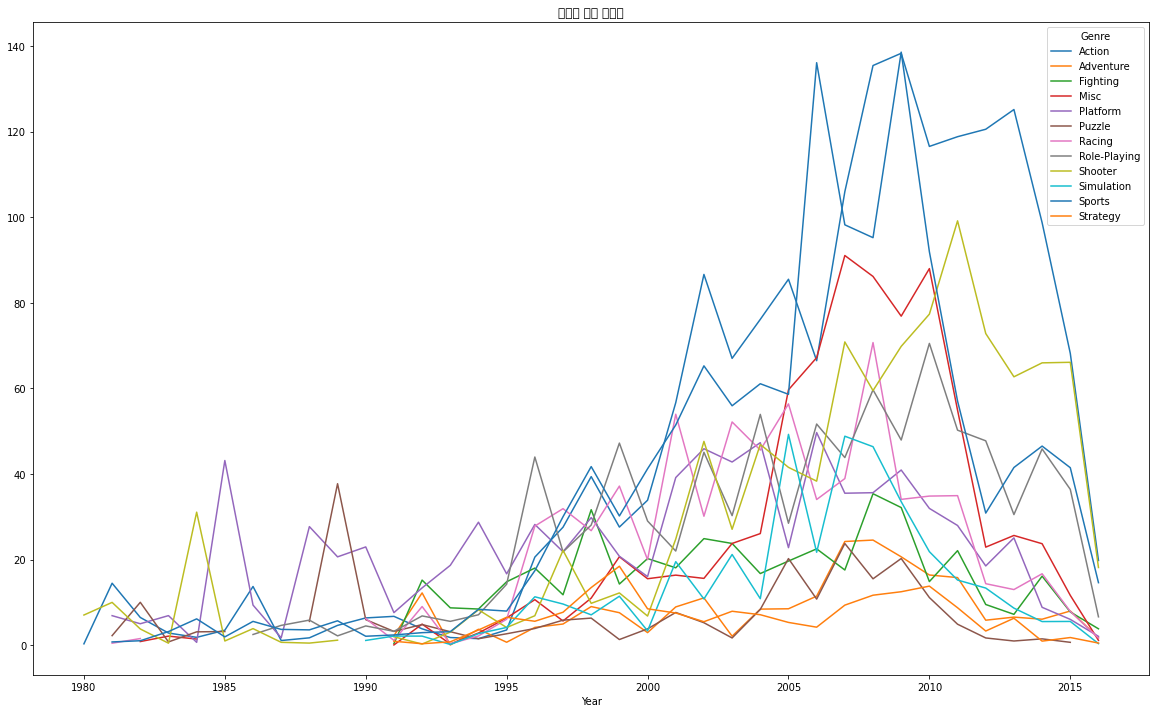

In [68]:
df_year_sum.unstack().plot(figsize=(20,12))
plt.title('장르별 게임 판매수')

Text(0.5, 1.0, '장르별 게임 발매량')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_

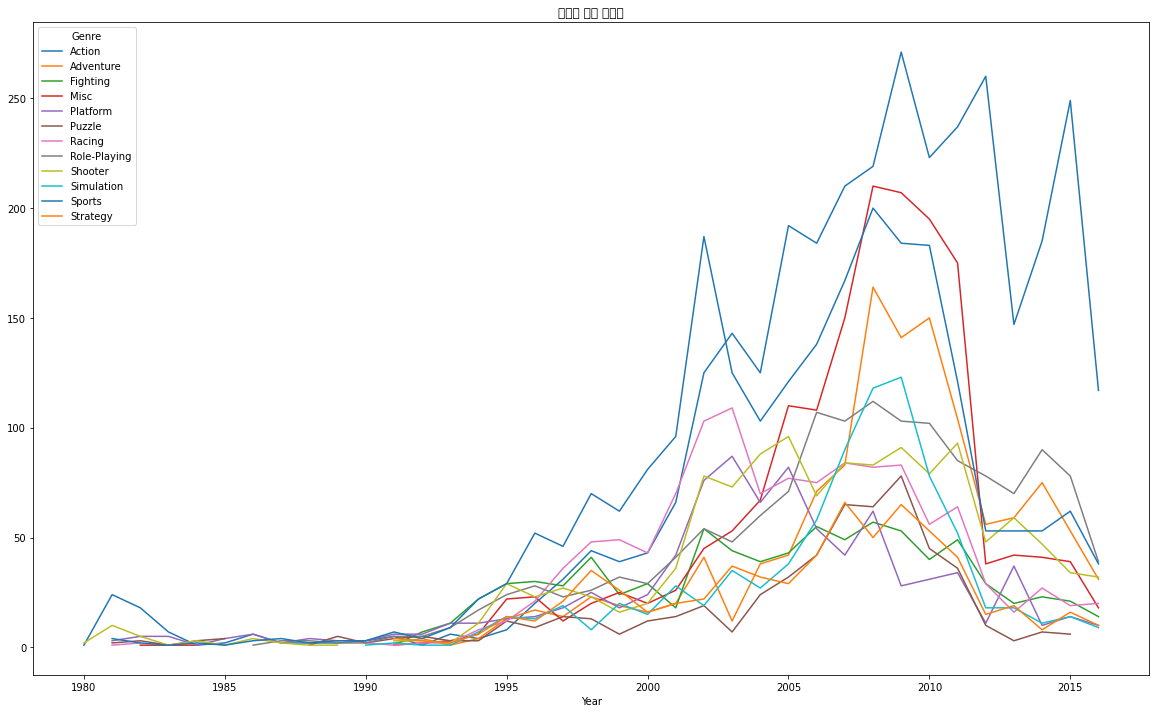

In [69]:
df.groupby('Year').Genre.value_counts().unstack().plot(figsize=(20,12))
plt.title('장르별 게임 발매량')

Text(0.5, 1.0, '장르별 게임 판매평균')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_

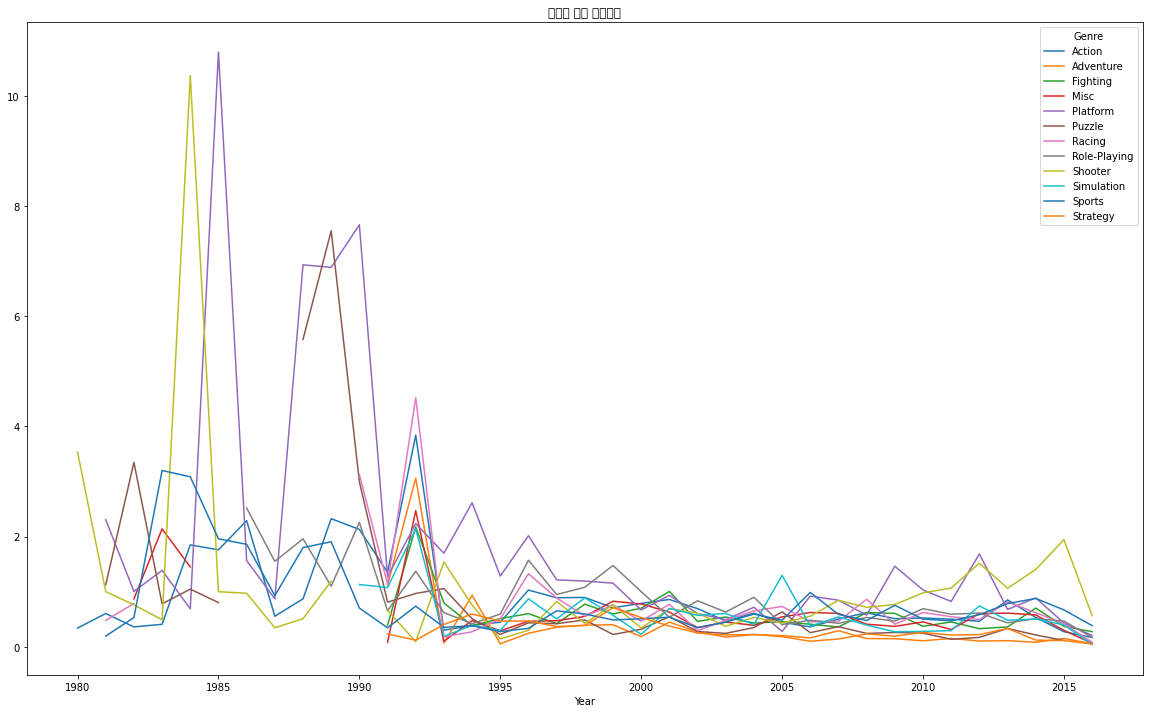

In [70]:
df_year_mean.unstack().plot(figsize=(20,12))
plt.title('장르별 게임 판매평균')

Text(0.5, 1.0, '표준편차')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_te

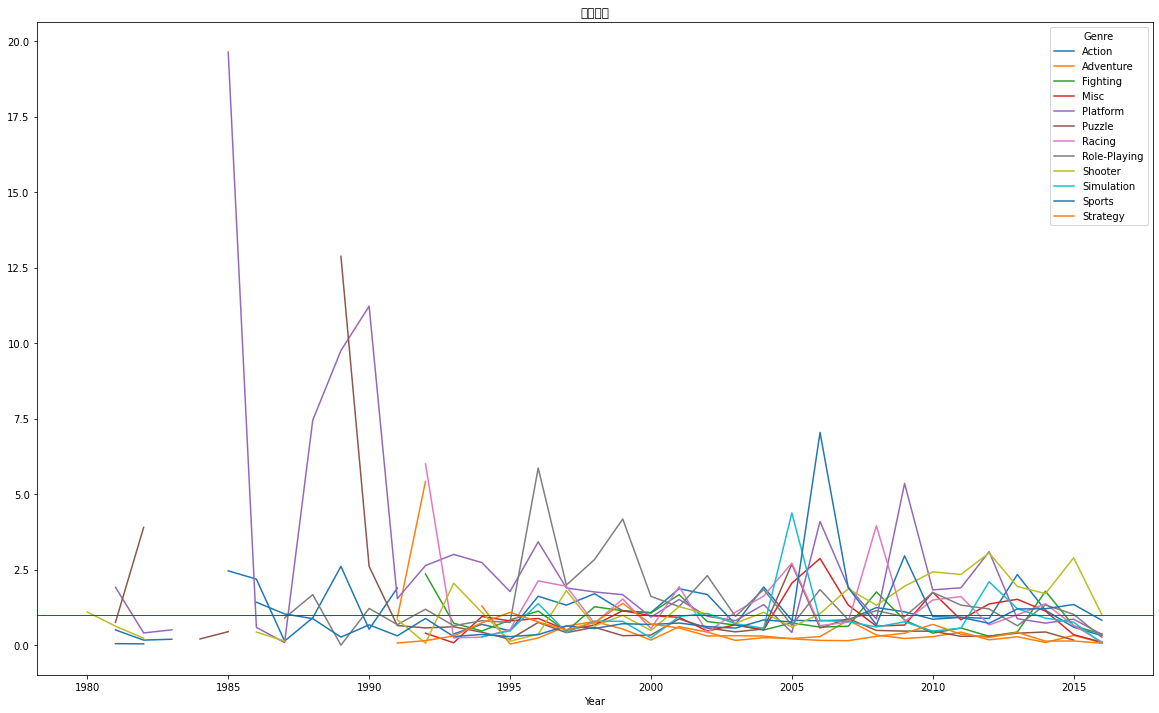

In [71]:
df.groupby(['Year','Genre'])['Total_Sales'].std().unstack().plot(figsize=(20,12))
plt.axhline(y=1, color='r', linewidth=1)

plt.title('표준편차')

In [72]:
df.loc[df.groupby(['Year','Genre'])['Total_Sales'].idxmax()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
12782,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
13872,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
5781,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
5568,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1354,Frogger,2600,1981,Action,Parker Bros.,2.06,0.12,0.00,0.02,2.20
...,...,...,...,...,...,...,...,...,...,...
12690,Dark Souls III,PlayStation,2016,Role-Playing,Namco Bandai Games,0.58,0.44,0.33,0.21,1.56
3906,Uncharted 4: A Thief's End,PlayStation,2016,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
10099,Story of Seasons: Good Friends of the Three Vi...,Nintendo,2016,Simulation,Marvelous Interactive,0.00,0.00,0.19,0.00,0.19
15054,FIFA 17,PlayStation,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78


In [73]:
'''
장르에 따른 게임 수를 기준으로 분석한 결과
타 장르에 비해 발매량이 많은 장르의 게임이 있으므로
게임 제작에 대한 트랜드가 존재하는 것으로 보인다.
또한 게임 판매량에 대한 평균 데이터를 분석하였을때 2000년 이후 특정 몇 장르를 제외하면
판매량 평균이 비슷한 것으로 보아 수요 또한 공급을 충분히 감당하고 있는 것으로 보인다.
따라서 게임의 수요와 공급을 종합해 보았을 때 게임의 장르에 시간의 흐름에 따른 트랜드가 있음을 짐작할 수 있다.
다만 개별 게임들의 판매량에 대한 표준편차를 분석해 보았을 때 그 크기가 큰 것으로 보아
게임의 판매량은 장르에 영향을 받기보다는 개별 게임에 대해 개별적으로 작용함을 추정할 수 있다.
'''

'\n장르에 따른 게임 수를 기준으로 분석한 결과\n타 장르에 비해 발매량이 많은 장르의 게임이 있으므로\n게임 제작에 대한 트랜드가 존재하는 것으로 보인다.\n또한 게임 판매량에 대한 평균 데이터를 분석하였을때 2000년 이후 특정 몇 장르를 제외하면\n판매량 평균이 비슷한 것으로 보아 수요 또한 공급을 충분히 감당하고 있는 것으로 보인다.\n따라서 게임의 수요와 공급을 종합해 보았을 때 게임의 장르에 시간의 흐름에 따른 트랜드가 있음을 짐작할 수 있다.\n다만 개별 게임들의 판매량에 대한 표준편차를 분석해 보았을 때 그 크기가 큰 것으로 보아\n게임의 판매량은 장르에 영향을 받기보다는 개별 게임에 대해 개별적으로 작용함을 추정할 수 있다.\n'

In [74]:
#3 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

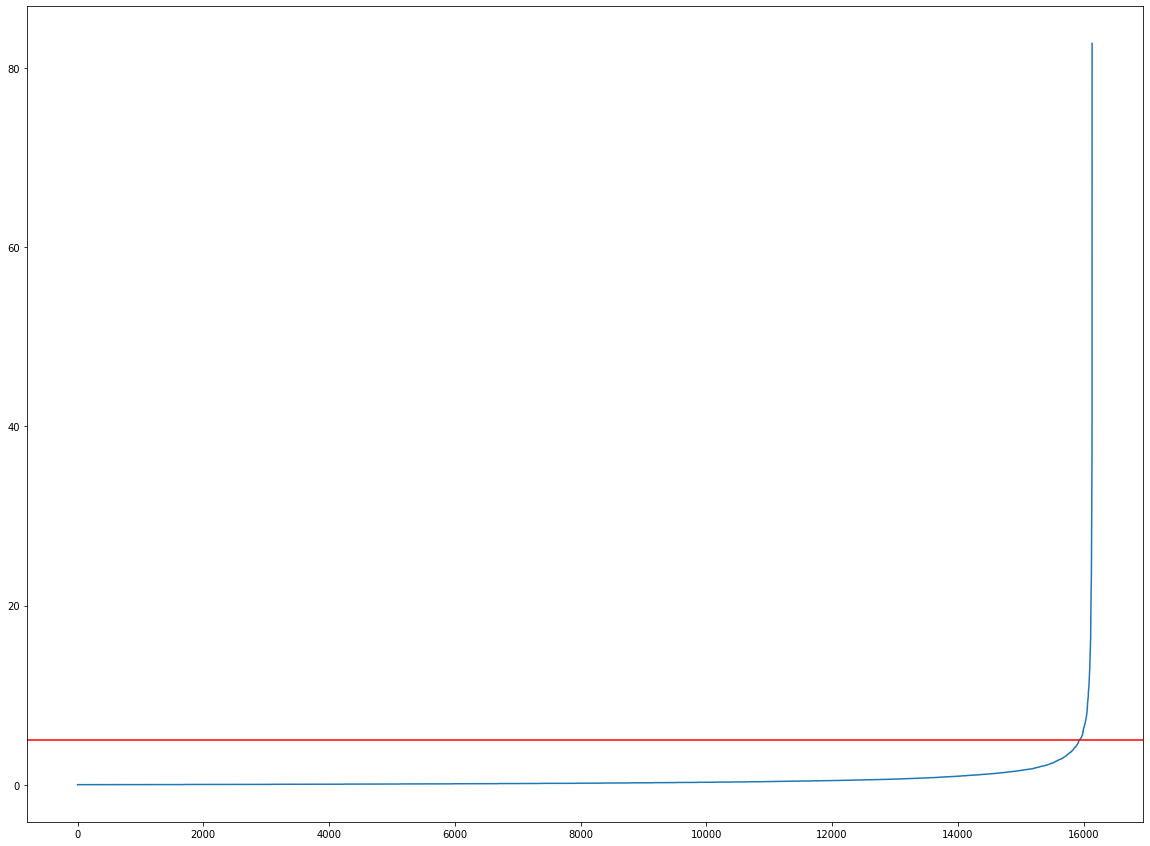

In [75]:
df_sorted = df.sort_values(by='Total_Sales').reset_index(drop=True)

plt.figure(figsize=(20,15))
plt.plot(df_sorted.index,df_sorted.Total_Sales)
plt.axhline(y=5,color='r')
#5를 기준으로 출고량이 높은 게임 분석

In [76]:
df_high_sales = df[df.Total_Sales > 5].reset_index(drop=True)
df_high_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Call of Duty 4: Modern Warfare,Xbox,2007,Shooter,Activision,5.91,2.38,0.13,0.90,9.32
1,Just Dance 3,Nintendo,2011,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27
2,Mario & Sonic at the Olympic Games,Nintendo,2008,Sports,Sega,1.64,2.48,0.44,0.58,5.14
3,Brain Age 2: More Training in Minutes a Day,Nintendo,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
4,Mario Kart 64,Nintendo,1996,Racing,Nintendo,5.55,1.94,2.23,0.15,9.87
...,...,...,...,...,...,...,...,...,...,...
196,Red Dead Redemption,PlayStation,2010,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,6.60
197,Grand Theft Auto IV,PlayStation,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58
198,Minecraft,PlayStation,2014,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
199,Super Mario Galaxy 2,Nintendo,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70


<BarContainer object of 12 artists>

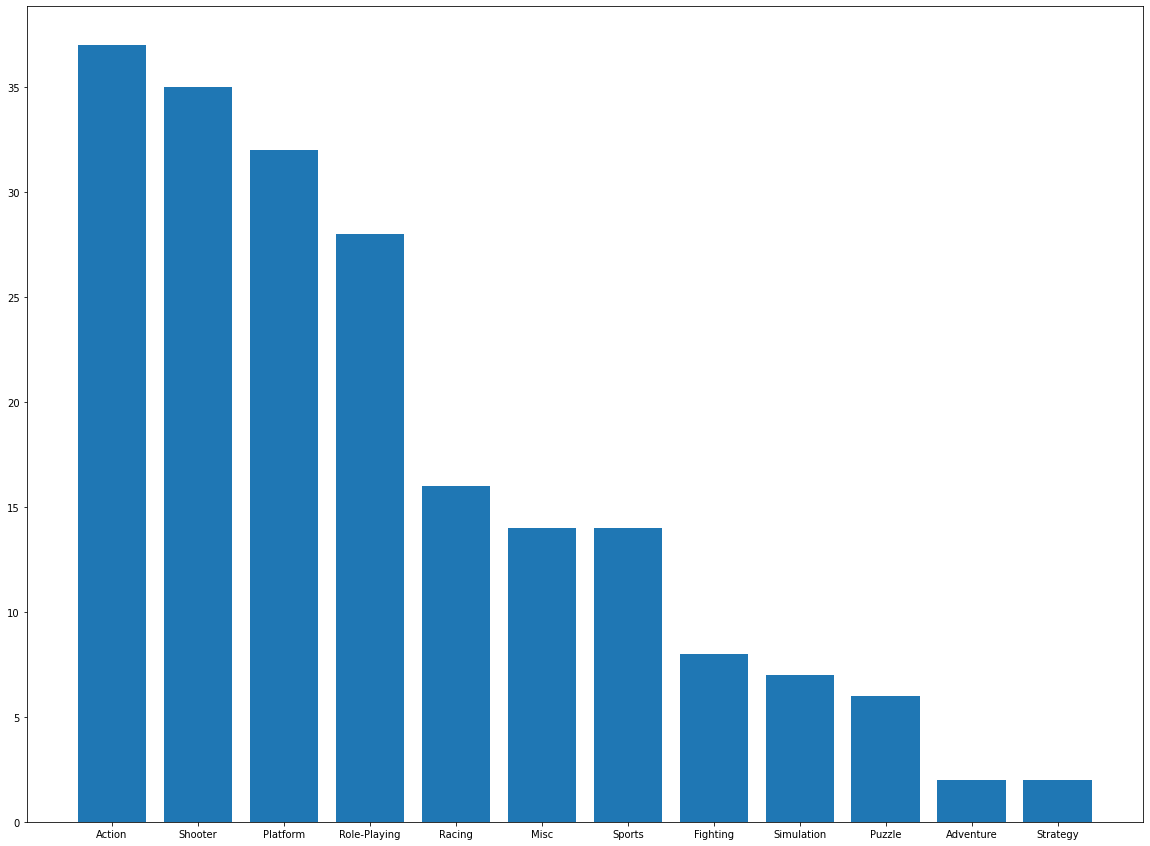

In [77]:
high_genre = df_high_sales.Genre.value_counts()

plt.figure(figsize=(20,15))
plt.bar(high_genre.index,high_genre)

In [78]:
#히트 게임의 장르 상위 7개
#Action, Shooter, Platform, RPG, Racing, Misc, Sports

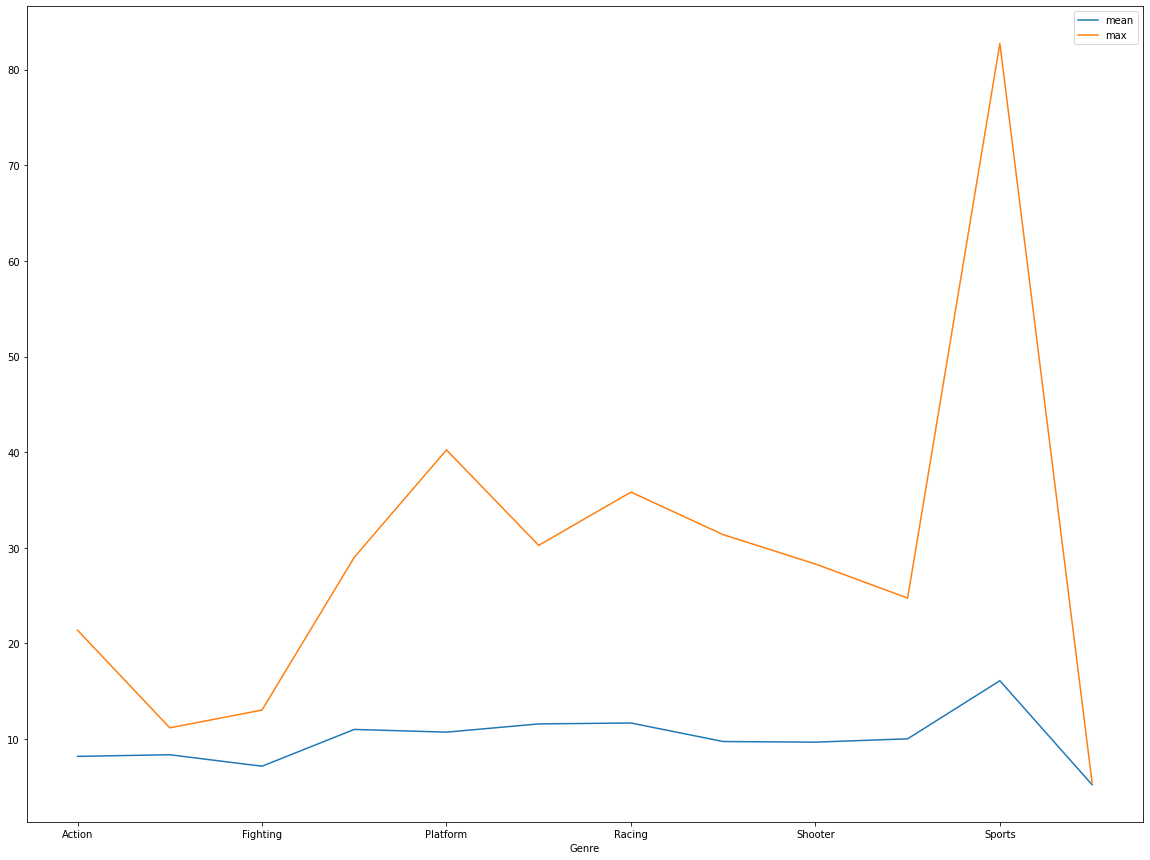

In [79]:
df_high_sales.groupby('Genre').Total_Sales.agg(['mean','max']).plot(figsize=(20,15))

In [80]:
#상위 6개의 히트 장르에 대해 평균값은 크게 차이가 없으며, 최댓값은 Sports 장르에서 가장 높았음을 알 수 있다.

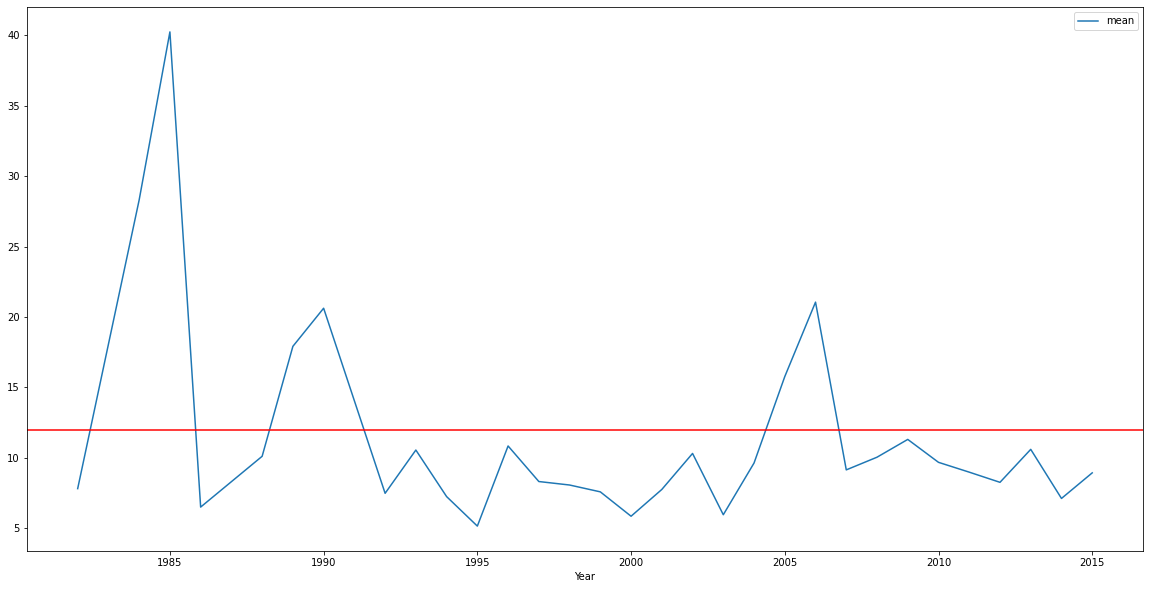

In [81]:
df_high_sales.groupby(['Year']).Total_Sales.agg(['mean']).plot(figsize=(20,10))
plt.axhline(y=12,color='r')

In [82]:
#히트 게임은 1990년 이전에 자주 등장했으며, 2007년 이후 같은 해에 12개 이상의 히트 게임이 나온 적이 없음을 알 수 있다.

In [83]:
len(df.Publisher.unique())

574

In [84]:
df_high_sales.Publisher.value_counts()

Nintendo                                  80
Activision                                22
Sony Computer Entertainment               17
Electronic Arts                           16
Microsoft Game Studios                    15
Take-Two Interactive                      13
Ubisoft                                    9
Capcom                                     3
Sega                                       3
Bethesda Softworks                         3
Konami Digital Entertainment               3
505 Games                                  2
Square Enix                                2
SquareSoft                                 2
Virgin Interactive                         2
Eidos Interactive                          2
Atari                                      1
GT Interactive                             1
LucasArts                                  1
Sony Computer Entertainment Europe         1
Universal Interactive                      1
RedOctane                                  1
Warner Bro

([<matplotlib.patches.Wedge at 0x7f20e0deba50>,
 [Text(0.34645251773977115, 1.0440165961093597, 'Nintendo'),
  Text(-1.0518514322214711, 0.3218828428693272, 'Activision'),
  Text(-1.0466921591376297, -0.338283200883235, 'Sony Computer Entertainment'),
  Text(-0.7436771973547267, -0.8105209597133309, 'Electronic Arts'),
  Text(-0.2805470156914119, -1.0636227583060842, 'Microsoft Game Studios'),
  Text(0.19665427555689965, -1.082278659082397, 'Take-Two Interactive'),
  Text(0.5500000371631095, -0.9526279227067503, 'Ubisoft'),
  Text(0.7179814880796492, -0.8333682156015627, 'Capcom'),
  Text(0.7928645038877672, -0.7624735264091502, 'Sega'),
  Text(0.8607797982515432, -0.6848781927627956, 'Bethesda Softworks'),
  Text(0.9211305291499055, -0.6012641252128845, 'Konami Digital Entertainment'),
  Text(0.9652595787043763, -0.5275167729271272, '505 Games'),
  Text(0.9963322340928682, -0.4661781626240275, 'Square Enix'),
  Text(1.0235118365326783, -0.4030180150781156, 'SquareSoft'),
  Text(1.0466

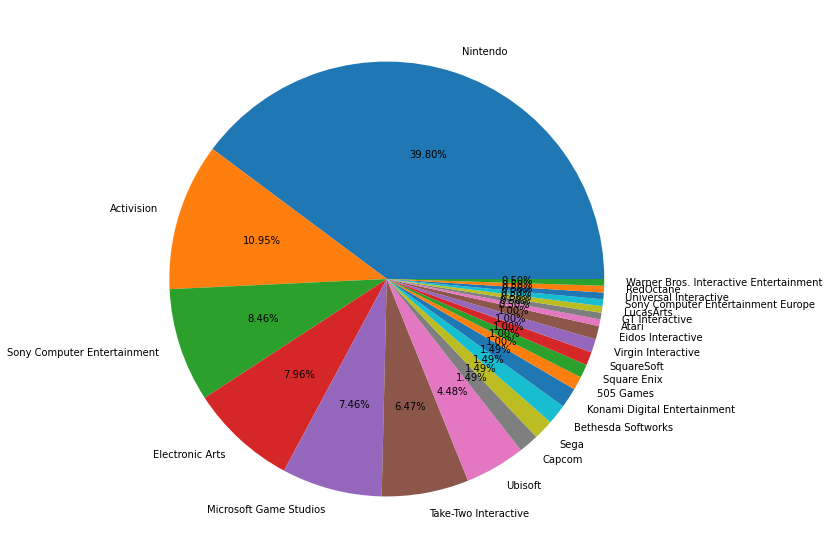

In [85]:
high_publisher = df_high_sales.Publisher.value_counts()

plt.figure(figsize=(25,10))
plt.pie(high_publisher, labels=high_publisher.index,autopct='%1.2f%%')

In [86]:
'''
전체 574개의 publisher 중 히트 게임을 만들어낸 곳은 23 곳에 불과하며
그 중에서도 6개의 publisher가 85% 이상의 비중을 차지하고 있음을 알 수 있다.
'''

'\n전체 574개의 publisher 중 히트 게임을 만들어낸 곳은 23 곳에 불과하며\n그 중에서도 6개의 publisher가 85% 이상의 비중을 차지하고 있음을 알 수 있다.\n'

([<matplotlib.patches.Wedge at 0x7f20e0d4acd0>,
 [Text(-0.11156107488731411, 1.094328162193584, 'Nintendo'),
  Text(-0.5350439523182777, -0.961107678196172, 'PlayStation'),
  Text(0.8389537471220001, -0.7114468428420744, 'Xbox'),
  Text(1.0914121597330058, -0.13718417396673738, 'PC'),
  Text(1.098790983707662, -0.05155942321970403, 'SEGA'),
  Text(1.0998656436469978, -0.017192030856623405, '2600')],
 [Text(-0.060851495393080414, 0.5969062702874094, '53.23%'),
  Text(-0.29184215580996964, -0.5242405517433665, '27.36%'),
  Text(0.4576111347938182, -0.3880619142774951, '16.42%'),
  Text(0.5953157234907304, -0.07482773125458402, '1.99%'),
  Text(0.5993405365678156, -0.028123321756202198, '0.50%'),
  Text(0.5999267147165442, -0.009377471376340039, '0.50%')])

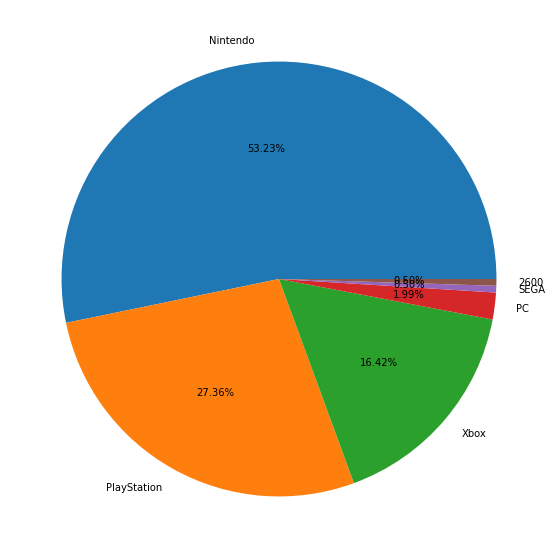

In [87]:
high_platform = df_high_sales.Platform.value_counts()

plt.figure(figsize=(25,10))
plt.pie(high_platform, labels=high_platform.index,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7f20e0cbe0d0>,
 [Text(0.9731056913869666, 0.5128989309701221, '2600'),
  Text(-0.23398090285134376, 1.074826933557617, 'Nintendo'),
  Text(-1.0507937458472072, 0.32531907980995395, 'PC'),
  Text(-0.9589290321651921, -0.5389388752639098, 'PlayStation'),
  Text(-0.2978719282283867, -1.0589014658472728, 'SEGA'),
  Text(0.7538521035171306, -0.8010661683174478, 'Xbox')],
 [Text(0.530784922574709, 0.2797630532564302, '15.44%'),
  Text(-0.12762594700982385, 0.5862692364859728, '25.94%'),
  Text(-0.5731602250075675, 0.1774467708054294, '7.68%'),
  Text(-0.523052199362832, -0.2939666592348599, '18.18%'),
  Text(-0.16247559721548366, -0.577582617734876, '6.80%'),
  Text(0.4111920564638894, -0.4369451827186078, '25.97%')])

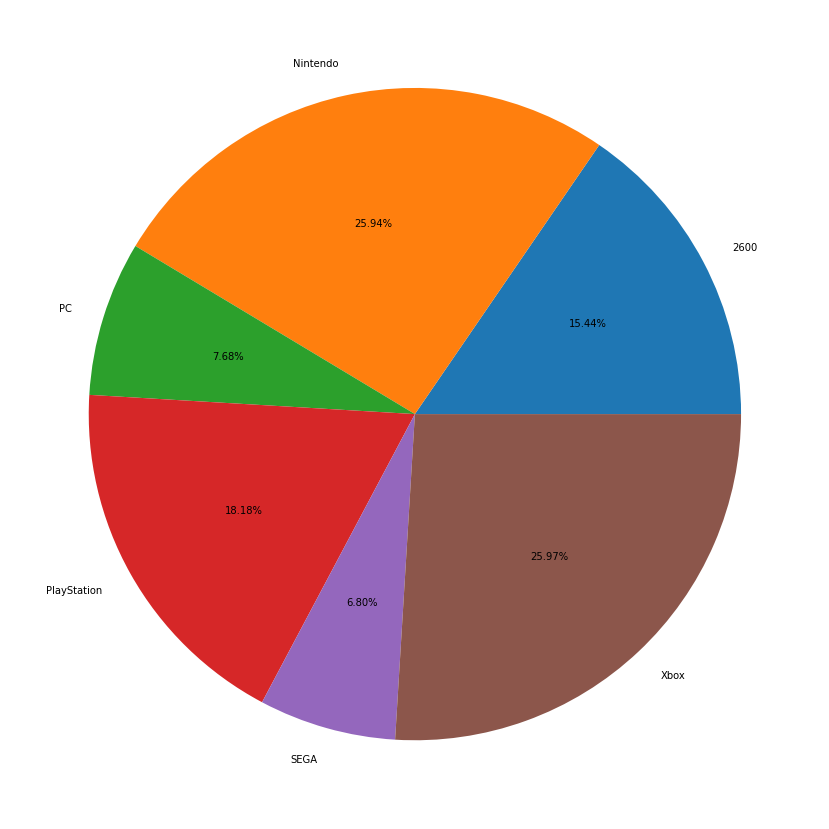

In [88]:
platform = df.Platform.value_counts()
k = platform.rdiv(high_platform,fill_value=0)
s = k[k>0]*100
plt.figure(figsize=(15,15))
plt.pie(s, labels=s.index,autopct='%1.2f%%')

In [89]:
#Platform을 바탕으로 분석해 보았을 때 PC 보다는 콘솔기기에서 히트 게임이 나올 가능성이 높음을 알 수 있다.

In [90]:
#4 다음 분기에 어떤 게임을 설계해야하는가

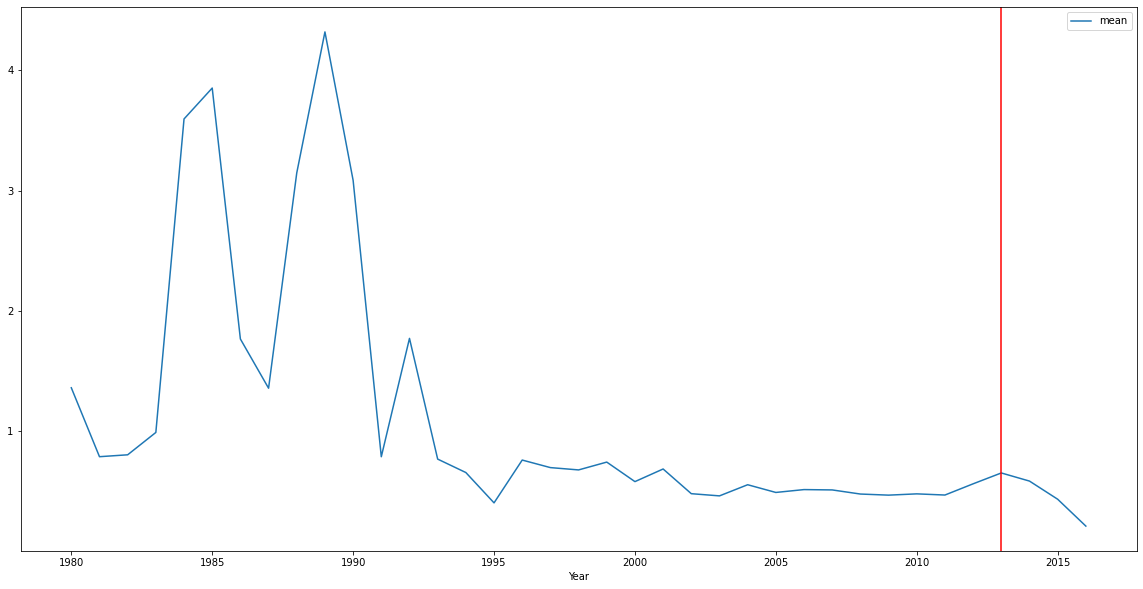

In [91]:
df.groupby(['Year']).Total_Sales.agg(['mean']).plot(figsize=(20,10))

plt.axvline(x=2013,color='r')

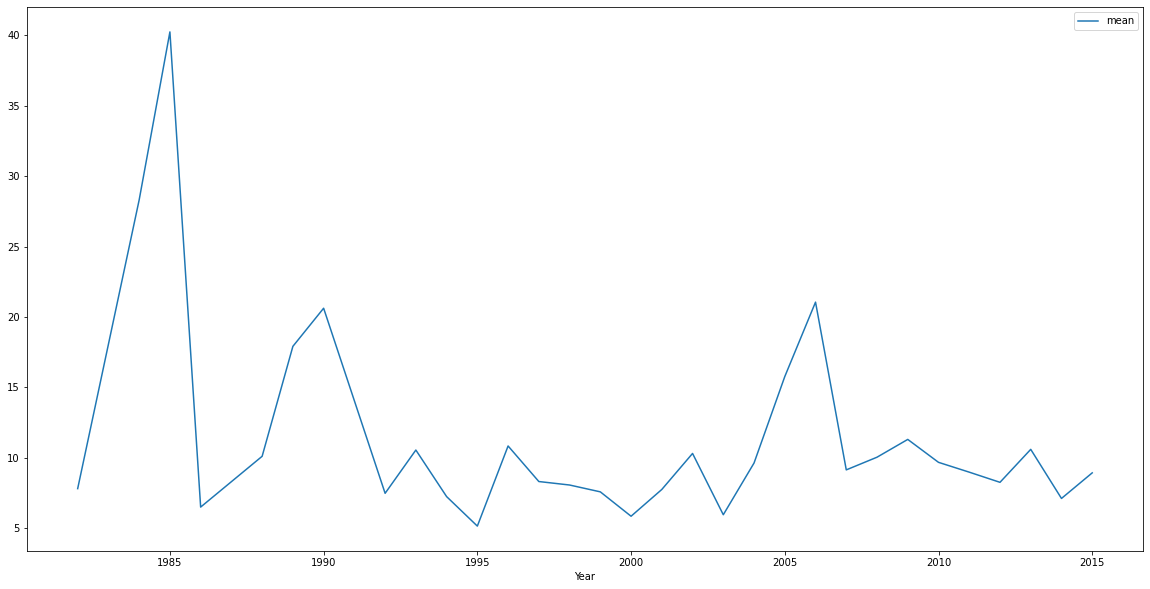

In [92]:
df_high_sales.groupby(['Year']).Total_Sales.agg(['mean']).plot(figsize=(20,10))

In [93]:
#게임의 연도별 출고량 평균을 살펴본 결과 게임의 구매량이 2013년 이후 하락세임을 알 수 있다. 특히 히트게임의 경우 2015년 이후 등장하지 않았음을 알 수 있다.

In [94]:
'''
위의 데이터 분석 결과를 종합해보면,현재 게임 산업은 하락세이며,
히트 게임에 대해서도 기대하기 어려운 상황이다.
따라서 큰 예산을 들여 대형 게임을 설계하기 보다는, 소예산으로 가성비 있는
게임을 만들어 내는 것이 바람직 할 것으로 보인다.
또한 가능하다면 콘솔 기반의 게임으로 출시하는 것이 바람직해 보인다.
다만 위의 분석 결과는 다음과 같은 한계점을 지닌다.
1. 데이터의 종류가 편향적이며, 게임산업 전체를 반영하기에 한정적이다.
위의 데이터는 콘솔 게임을 중심으로 이루어졌으며, PC게임에 대한 데이터가 다수 누락되었다. 
2021년 기준 콘솔 게임의 시장 점유율은28%, PC게임의 시장 점유율은 19%이다.
2. 모바일 게임 시장을 반영하지 못한다.
스마트폰의 발달로 모바일 게임 시장은 급격히 성장하였으며 2021년 기준 모바일 게임의 시장 점유율은 45%이다.
3. 히트게임에 대한 분석도 마찬가지로, 2015년 이후에도 히트게임이 다수 등장했으나
데이터의 누락으로 반영되지 못하였다.
4. 히트 게임과 Publisher간의 관계에서 게임의 완성도, 투입된 예산과 같은 데이터가 없었기 때문에
히트 게임의 판매량이 게임 자체의 완성도에 기인했는지, Publisher에 대한 충성도가 게임 판매량과 유의미한 상관관계가 있는지 분석하지 못하였다.
'''

'\n위의 데이터 분석 결과를 종합해보면,현재 게임 산업은 하락세이며,\n히트 게임에 대해서도 기대하기 어려운 상황이다.\n따라서 큰 예산을 들여 대형 게임을 설계하기 보다는, 소예산으로 가성비 있는\n게임을 만들어 내는 것이 바람직 할 것으로 보인다.\n또한 가능하다면 콘솔 기반의 게임으로 출시하는 것이 바람직해 보인다.\n다만 위의 분석 결과는 다음과 같은 한계점을 지닌다.\n1. 데이터의 종류가 편향적이며, 게임산업 전체를 반영하기에 한정적이다.\n위의 데이터는 콘솔 게임을 중심으로 이루어졌으며, PC게임에 대한 데이터가 다수 누락되었다. \n2021년 기준 콘솔 게임의 시장 점유율은28%, PC게임의 시장 점유율은 19%이다.\n2. 모바일 게임 시장을 반영하지 못한다.\n스마트폰의 발달로 모바일 게임 시장은 급격히 성장하였으며 2021년 기준 모바일 게임의 시장 점유율은 45%이다.\n3. 히트게임에 대한 분석도 마찬가지로, 2015년 이후에도 히트게임이 다수 등장했으나\n데이터의 누락으로 반영되지 못하였다.\n4. 히트 게임과 Publisher간의 관계에서 게임의 완성도, 투입된 예산과 같은 데이터가 없었기 때문에\n히트 게임의 판매량이 게임 자체의 완성도에 기인했는지, Publisher에 대한 충성도가 게임 판매량과 유의미한 상관관계가 있는지 분석하지 못하였다.\n'